In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


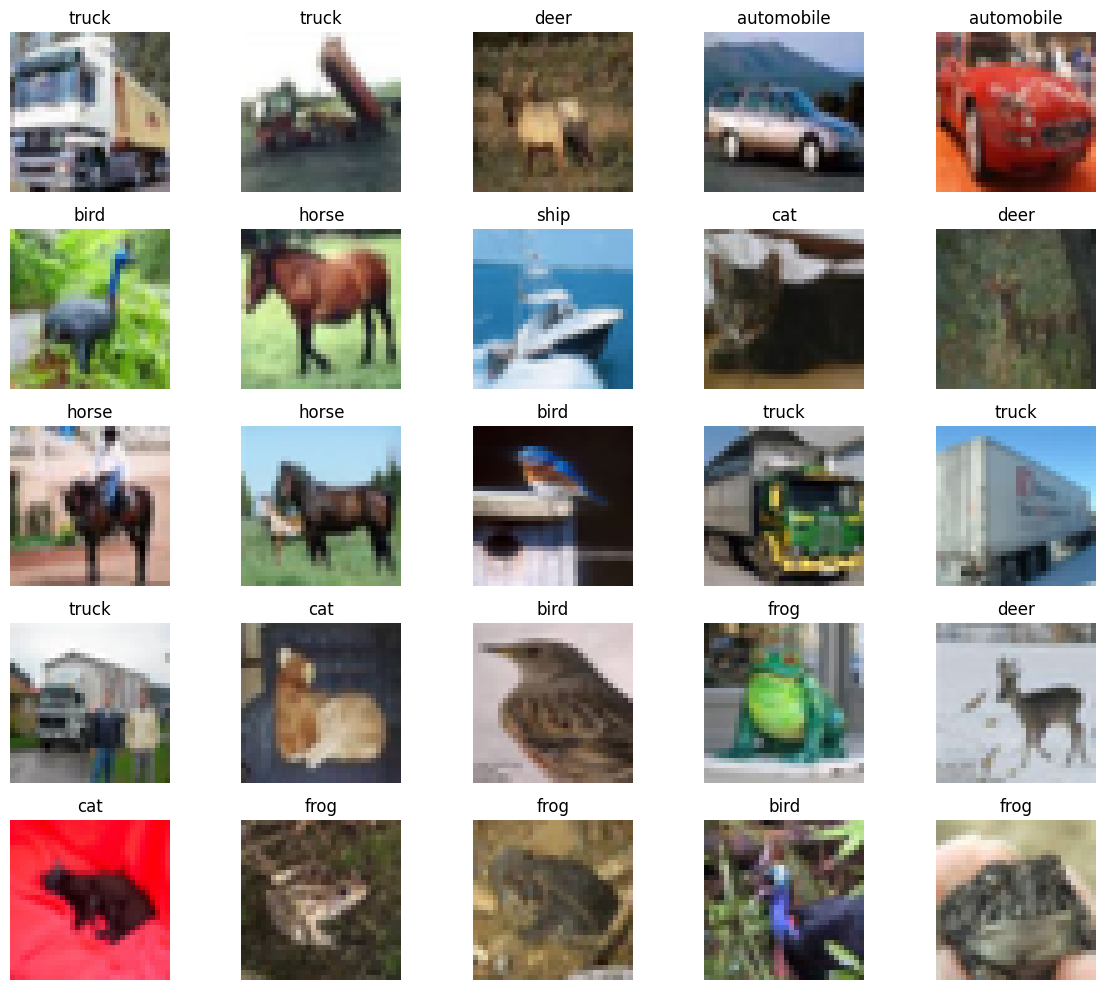

In [5]:
visualize_images(sample,(5,5))

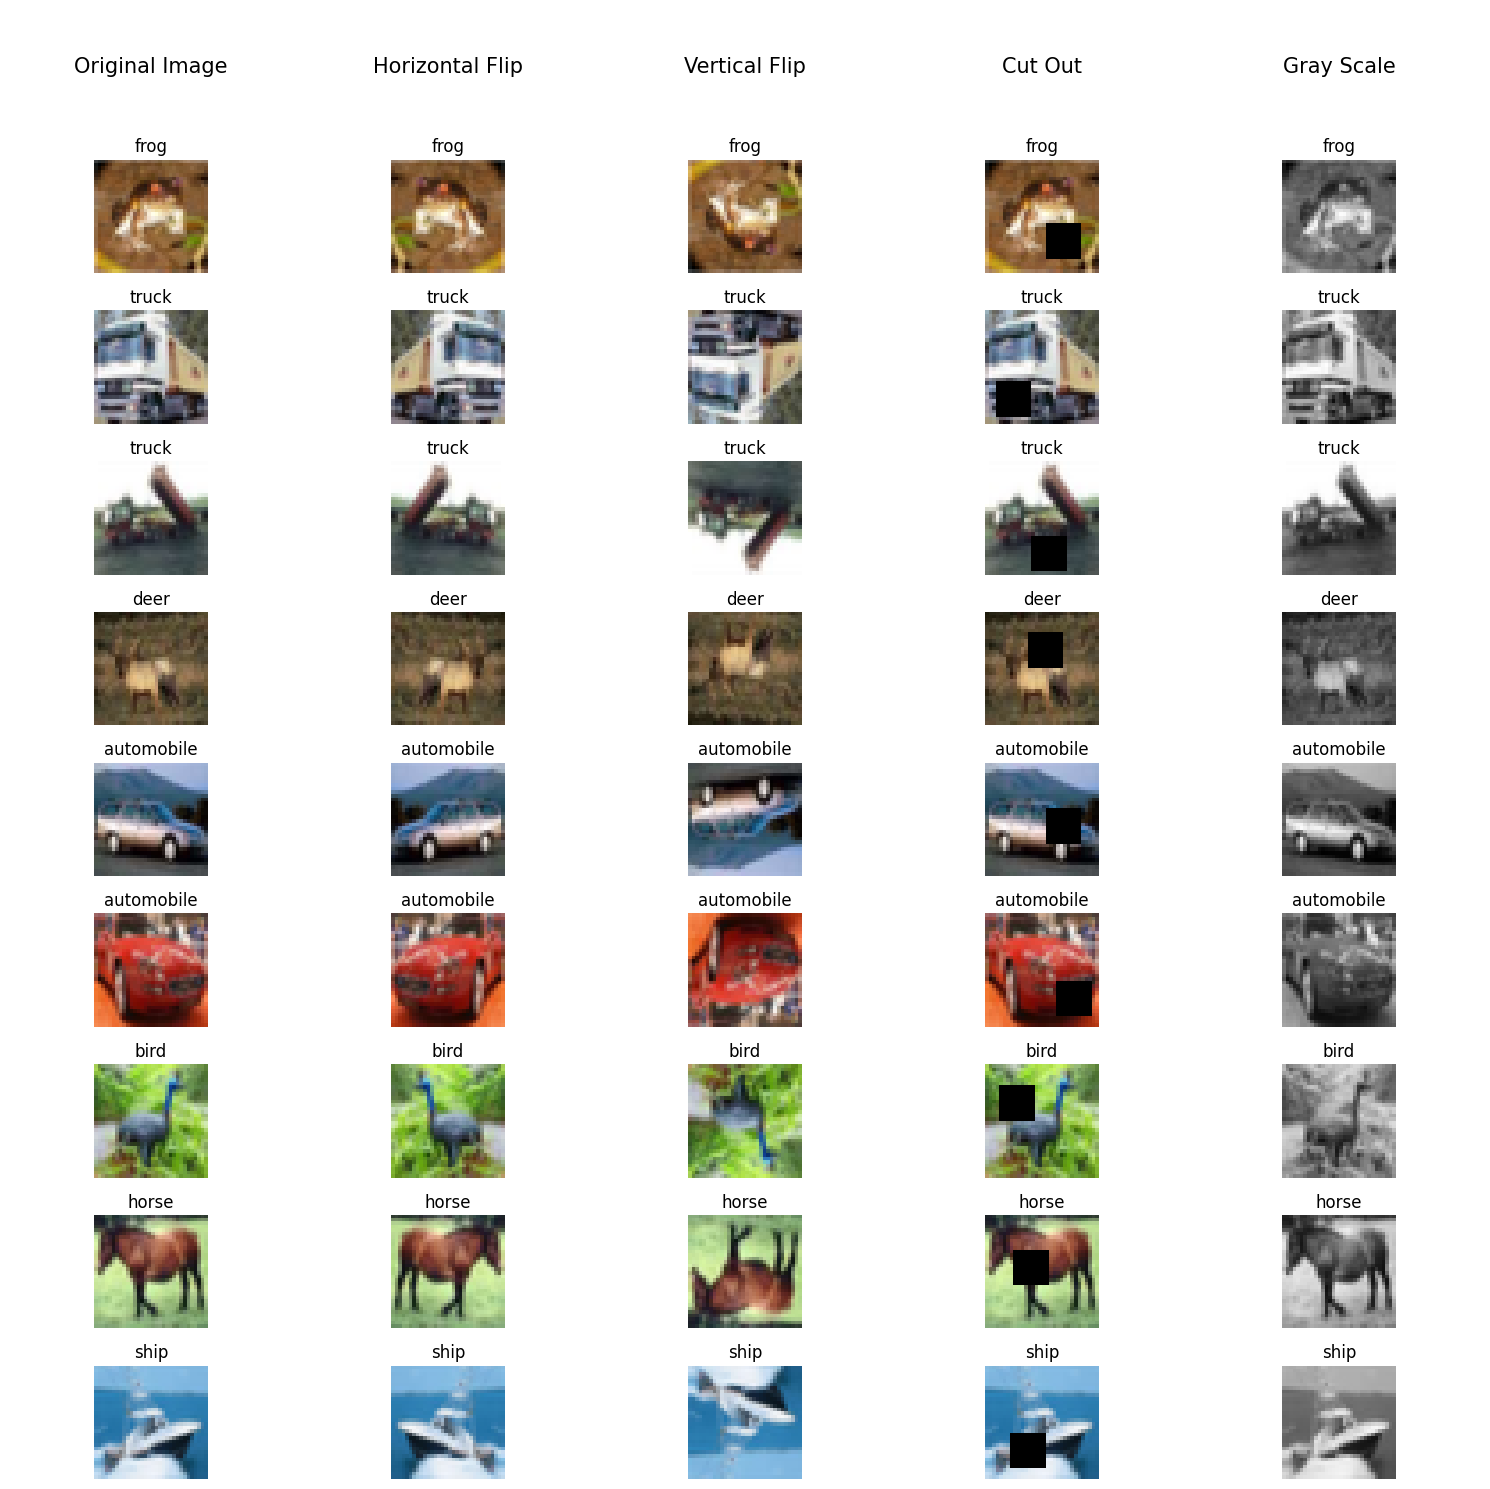

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=128,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=128,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="ln").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
         GroupNorm-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
         GroupNorm-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
        GroupNorm-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 20,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "step_size":3,
                       "gamma":0.2,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.8913 Batch_id=390 Accuracy=24.25: 100%|██████████| 391/391 [00:20<00:00, 18.97it/s]


Test set: Average loss: 1.7459, Accuracy: 3615/10000 (36.15%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 2


Train: Loss=1.6967 Batch_id=390 Accuracy=34.81: 100%|██████████| 391/391 [00:19<00:00, 19.75it/s]


Test set: Average loss: 1.5654, Accuracy: 4282/10000 (42.82%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 3


Train: Loss=1.8231 Batch_id=390 Accuracy=39.37: 100%|██████████| 391/391 [00:19<00:00, 20.35it/s]


Test set: Average loss: 1.4349, Accuracy: 4880/10000 (48.80%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 4


Train: Loss=1.6629 Batch_id=390 Accuracy=42.67: 100%|██████████| 391/391 [00:18<00:00, 20.63it/s]


Test set: Average loss: 1.3109, Accuracy: 5340/10000 (53.40%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 5


Train: Loss=1.5040 Batch_id=390 Accuracy=45.43: 100%|██████████| 391/391 [00:20<00:00, 19.18it/s]


Test set: Average loss: 1.2887, Accuracy: 5422/10000 (54.22%)

Adjusting learning rate of group 0 to 6.0016e-04.
Epoch 6


Train: Loss=1.5551 Batch_id=390 Accuracy=47.33: 100%|██████████| 391/391 [00:20<00:00, 18.90it/s]


Test set: Average loss: 1.2546, Accuracy: 5598/10000 (55.98%)

Adjusting learning rate of group 0 to 6.0023e-04.
Epoch 7


Train: Loss=1.2836 Batch_id=390 Accuracy=49.57: 100%|██████████| 391/391 [00:19<00:00, 19.92it/s]


Test set: Average loss: 1.1365, Accuracy: 6033/10000 (60.33%)

Adjusting learning rate of group 0 to 6.0032e-04.
Epoch 8


Train: Loss=1.2088 Batch_id=390 Accuracy=50.84: 100%|██████████| 391/391 [00:19<00:00, 20.16it/s]


Test set: Average loss: 1.1163, Accuracy: 6054/10000 (60.54%)

Adjusting learning rate of group 0 to 6.0041e-04.
Epoch 9


Train: Loss=1.3161 Batch_id=390 Accuracy=52.19: 100%|██████████| 391/391 [00:20<00:00, 19.33it/s]


Test set: Average loss: 1.0557, Accuracy: 6335/10000 (63.35%)

Adjusting learning rate of group 0 to 6.0052e-04.
Epoch 10


Train: Loss=1.4286 Batch_id=390 Accuracy=53.93: 100%|██████████| 391/391 [00:19<00:00, 19.82it/s]


Test set: Average loss: 1.0489, Accuracy: 6320/10000 (63.20%)

Adjusting learning rate of group 0 to 6.0065e-04.
Epoch 11


Train: Loss=1.2673 Batch_id=390 Accuracy=54.34: 100%|██████████| 391/391 [00:19<00:00, 20.53it/s]


Test set: Average loss: 1.0140, Accuracy: 6506/10000 (65.06%)

Adjusting learning rate of group 0 to 6.0078e-04.
Epoch 12


Train: Loss=1.4218 Batch_id=390 Accuracy=55.25: 100%|██████████| 391/391 [00:19<00:00, 19.74it/s]


Test set: Average loss: 0.9891, Accuracy: 6545/10000 (65.45%)

Adjusting learning rate of group 0 to 6.0093e-04.
Epoch 13


Train: Loss=1.3182 Batch_id=390 Accuracy=56.27: 100%|██████████| 391/391 [00:19<00:00, 19.59it/s]


Test set: Average loss: 0.9805, Accuracy: 6610/10000 (66.10%)

Adjusting learning rate of group 0 to 6.0109e-04.
Epoch 14


Train: Loss=1.3566 Batch_id=390 Accuracy=57.37: 100%|██████████| 391/391 [00:19<00:00, 20.49it/s]


Test set: Average loss: 0.9885, Accuracy: 6510/10000 (65.10%)

Adjusting learning rate of group 0 to 6.0127e-04.
Epoch 15


Train: Loss=1.1542 Batch_id=390 Accuracy=57.66: 100%|██████████| 391/391 [00:18<00:00, 20.72it/s]


Test set: Average loss: 0.9095, Accuracy: 6848/10000 (68.48%)

Adjusting learning rate of group 0 to 6.0145e-04.
Epoch 16


Train: Loss=1.2579 Batch_id=390 Accuracy=58.40: 100%|██████████| 391/391 [00:20<00:00, 19.35it/s]


Test set: Average loss: 0.8996, Accuracy: 6907/10000 (69.07%)

Adjusting learning rate of group 0 to 6.0165e-04.
Epoch 17


Train: Loss=1.1795 Batch_id=390 Accuracy=58.57: 100%|██████████| 391/391 [00:20<00:00, 19.38it/s]


Test set: Average loss: 0.8761, Accuracy: 7013/10000 (70.13%)

Adjusting learning rate of group 0 to 6.0187e-04.
Epoch 18


Train: Loss=1.1780 Batch_id=390 Accuracy=59.29: 100%|██████████| 391/391 [00:18<00:00, 20.83it/s]


Test set: Average loss: 0.8963, Accuracy: 6861/10000 (68.61%)

Adjusting learning rate of group 0 to 6.0209e-04.
Epoch 19


Train: Loss=1.3786 Batch_id=390 Accuracy=59.78: 100%|██████████| 391/391 [00:19<00:00, 19.86it/s]


Test set: Average loss: 0.8726, Accuracy: 6966/10000 (69.66%)

Adjusting learning rate of group 0 to 6.0233e-04.
Epoch 20


Train: Loss=1.2963 Batch_id=390 Accuracy=60.45: 100%|██████████| 391/391 [00:20<00:00, 18.97it/s]


Test set: Average loss: 0.8519, Accuracy: 7112/10000 (71.12%)

Adjusting learning rate of group 0 to 6.0258e-04.


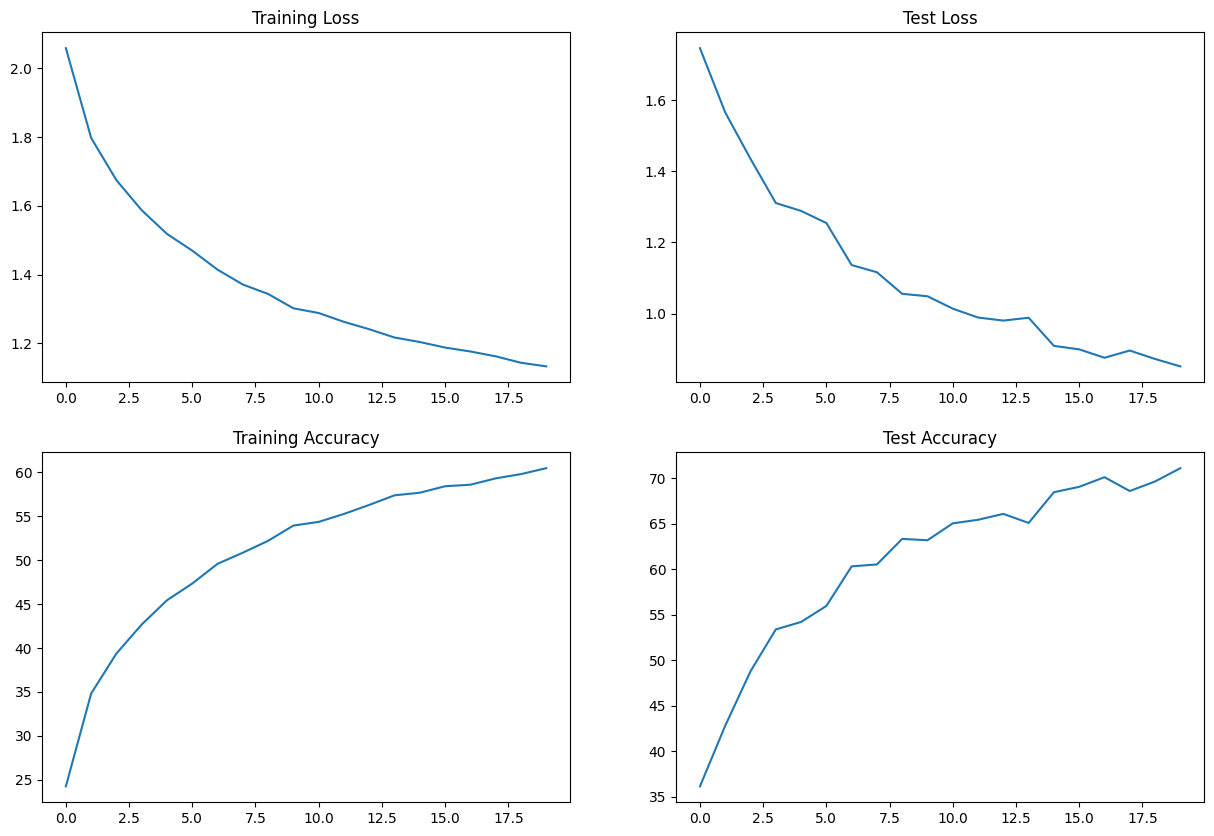

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

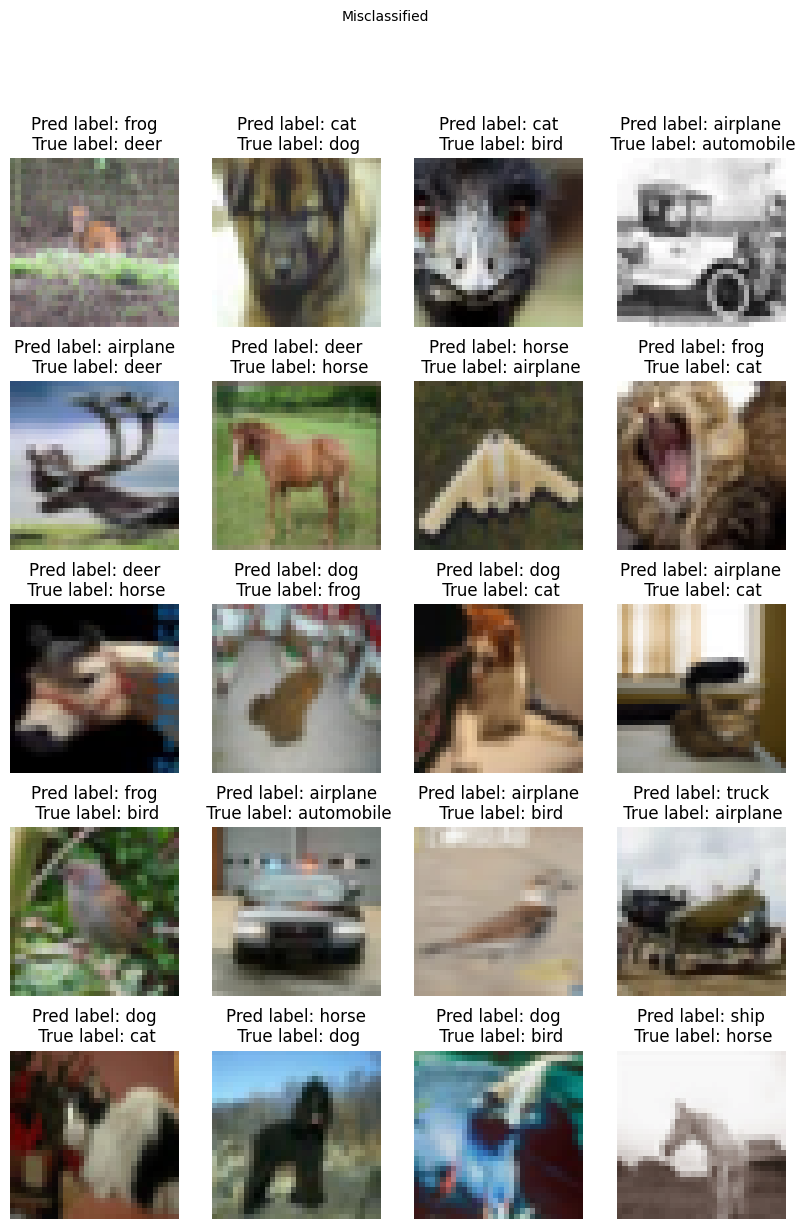

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 73 %

Accuracy of automobile : 76 %

Accuracy of  bird : 52 %

Accuracy of   cat : 37 %

Accuracy of  deer : 66 %

Accuracy of   dog : 65 %

Accuracy of  frog : 78 %

Accuracy of horse : 74 %

Accuracy of  ship : 88 %

Accuracy of truck : 81 %
{'airplane': 73.61111111111111, 'automobile': 76.92307692307692, 'bird': 52.87356321839081, 'cat': 37.5, 'deer': 66.66666666666667, 'dog': 65.75342465753425, 'frog': 78.65168539325843, 'horse': 74.35897435897436, 'ship': 88.37209302325581, 'truck': 81.33333333333333}


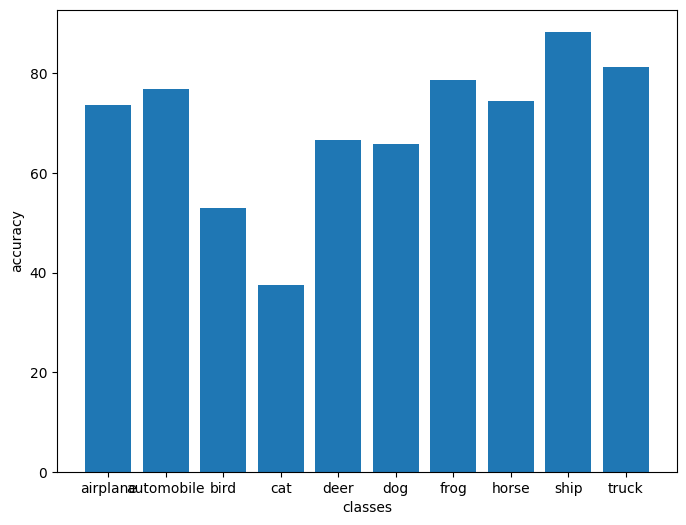

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)